In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
file = open('./adult.data', 'r')
def chr_int(a):
    if a.isdigit(): return int(a)
    else: return 0

data = []
for line in file:
    data1 = line.split(', ')
    if len(data1) == 15:
        data.append([
            chr_int(data1[0]), data1[1],
            chr_int(data1[2]), data1[3],
            chr_int(data1[4]), data1[5],
            data1[6], data1[7], data1[8],
            data1[9], chr_int(data1[10]),
            chr_int(data1[11]),
            chr_int(data1[12]),
            data1[13], data1[14].strip()
        ])

data[0:2]

[[39,
  'State-gov',
  77516,
  'Bachelors',
  13,
  'Never-married',
  'Adm-clerical',
  'Not-in-family',
  'White',
  'Male',
  2174,
  0,
  40,
  'United-States',
  '<=50K'],
 [50,
  'Self-emp-not-inc',
  83311,
  'Bachelors',
  13,
  'Married-civ-spouse',
  'Exec-managerial',
  'Husband',
  'White',
  'Male',
  0,
  0,
  13,
  'United-States',
  '<=50K']]

# Worksheet 2
 * what does the 'r' do in the first line?
 * describe the function of chr_int in second line
 * try compiling this with the data1 = line.split(', ')

# Worksheet 3

* what might be the best data structure to place this data in? (DataFrame)

In [5]:
# turn data (which is currently an array) into dataframe

adult = pd.DataFrame(
    data,
    columns = [
        'age', 'type-employer', 'fnlwgt',
        'education', 'education_num', 'marital',
        'occupation', 'relationship','race',
        'sex', 'capital_gain', 'capital_loss',
        'hr_per_week', 'country', 'income'
    ]

)

adult

,age,type-employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# Worksheet 4

Notice in the last cell we listed a bunch of column names, but the original data file didn't have any column names. How does python know how to associate a column name to its column?

# Worksheet 5

Print the first few lines of the adult dataframe. Go to the pandas documentation website and read about the 'columns' parameter.

# Recall the guiding research question

*Are men more likely than women to become high income earners? where high income earners are those who earn more than $ 50k/year.

This question is just asking is the proportion of men who earn above 50k higher, equal or less than the proportion of all women who earn above 50k. This is different than asking if male ER doctors earn more then female ER doctors, e.g.

## We'll use this research question to inspire the creation of several sub-dataframes to make our analysis a bit easier.

Here are some examples:
* all men
* all women
* high income men
* high income women
* low income men
* low income women

In [6]:
men = adult[adult['sex'] == "Male"]
women = adult[adult['sex'] == "Female"]
men_high_income = adult[(adult['sex']=="Male") &(adult['income'] == ">50K")]
women_high_income = adult[(adult['sex']=="Female") &(adult['income'] == ">50K")]
men_low_income = adult[(adult['sex']=="Male") &(adult['income'] == "<=50K")]
women_low_income = adult[(adult['sex']=="Female") &(adult['income'] == "<=50K")]

In [7]:
men_high_income

,age,type-employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
20,40,Private,193524,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
45,57,Federal-gov,337895,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,40,United-States,>50K


# Module 2 Topic 3 -- EDA Basics

One of the first tasks of EDA is to find out how much and what kind of data you have.  One way of finding out "how much" is the following

In [8]:
adult.shape
# this returns the number of rows and columns

(32561, 15)

Notice there are 15 columns. These are alternatively called:
* column
* variable
* feature
* covariate

# Worksheet 2

Find the size of some of those dataframes: men, women, men_high_income, etc.

In [9]:
men.shape

(21790, 15)

In [10]:
women.shape

(10771, 15)

In [11]:
men_high_income.shape

(6662, 15)

In [12]:
women_high_income.shape

(1179, 15)

In [13]:
men_low_income.shape

(15128, 15)

In [14]:
women_low_income.shape

(9592, 15)

Some questions when performing EDA

* what are the features/columns in the dataset?
* Are they numerical or categorical?
* Does the data seem sensible? Is it relevant?
* Does the data seem to be in the right scale?
* Does it seem like there's a lot of missing data?
* Do you know what all the variables are? e.g. what is 'education_number' or 'fnlwgt'

# Module 2 Topic 4

In [15]:
# The mean age of adults
adult['age'].mean()

38.58164675532078

## Worksheet 1

In [16]:
men['age'].mean()

39.43354749885268

In [17]:
women['age'].mean()

36.85823043357163

In [18]:
men_high_income['age'].mean()

44.62578805163614

In [19]:
women_high_income['age'].mean()

42.125530110262936

In [20]:
# variance of age
adult['age'].var()

186.06140024879625

In [21]:
# standard deviation
adult['age'].std()

13.640432553581146

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B3977B8>,
      dtype=object)

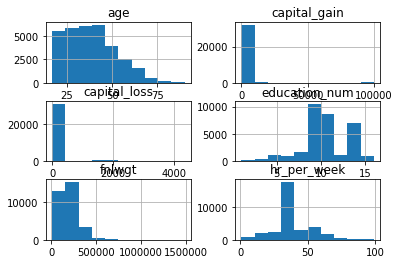

In [22]:
# histogram for all numerical data
adult.hist()

## Worksheet 3

How might I find out how to make my histogram bigger? Ans: look up histogram function online.

## worksheet 4

Make a histogram for all the numerical variables in men, women, high income men, high income women

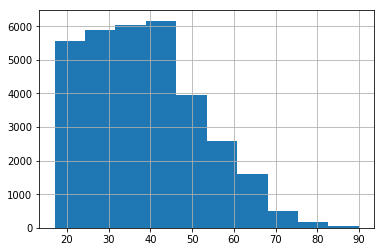

In [23]:
adult['age'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000004991C18>]],
      dtype=object)

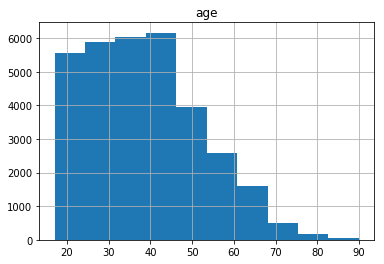

In [24]:
adult.hist(column = 'age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C744E80>,
      dtype=object)

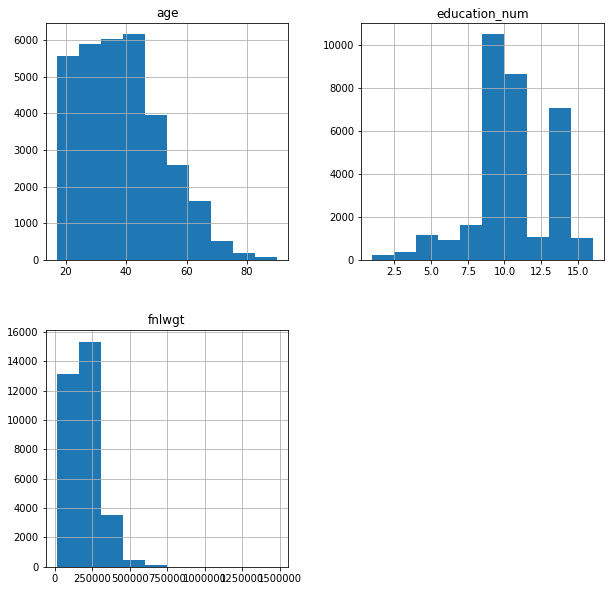

In [25]:
adult.hist(column = ['age','fnlwgt', 'education_num'],figsize = (10,10))

Questions to ask yourself
* Do any variables seem not useful or redundent?
* Are there better (wider/narrower) bin widths for histograms?
* Should we turn any of the numerical variables into catagorical variables?
* Are there any unexpected distributions?
* Are there any immediately appearent outliers?

## Center and distance -- Median and InterQuartile Range (IQR)

Median is another kind of average that captures the middle data point (if odd number of data points) or the mean of the middle two data points (if even)

In [26]:
adult['age'].median()

37.0

## Worksheet 5

Find the median ages

In [27]:
men['age'].median()

38.0

In [28]:
women['age'].median()

35.0

In [29]:
men_high_income['age'].median()

44.0

In [30]:
women_high_income['age'].median()

41.0

## Quantiles

A quantile is a way to split up the dataset into equal sized pieces.
* percentiles chop up data into 100 pieces
* quartiles chop up data into 4 pieces
* quintiles chop up data into 5 pieces

**example**
Consider the dataset (1, 2, 24, 36, 1345)
* 1 is in 0th percentile
* 2 is in the 25th percentile or 1st quartile
* 24 is in the 50th percentile or 2nd quartile
* etc


# worksheet 6

What is another name for the 50th percentile.

ans: median

Quantiles aren't always numbers in the dataset e.g.

the 50th percentile of the dataset (1,2) is 1.5.
the 10th percentile of the dataset (1,2) is 1.1 (we interpolate 10% of the way from 1 to 2

In [31]:
# computing quantiles in python

print adult['age'].quantile(.1) # tenth percentile
print adult['age'].quantile(.25) #25th percentile or 1st quartile
print adult['age'].quantile(.5) #50th percentile or median or 2nd quartile

22.0
28.0
37.0


The interquartile range is our measure of distance between datapoints

IQR = 3rd quartile - 1st quartile

## Worksheet 8

Define a function using def that measures the IQR and apply it to adult['age']

In [32]:
def IQR(x):
    return x.quantile(.75) - x.quantile(.25)

IQR(adult['age'])

20.0

## Visualize median & IQR with boxplots

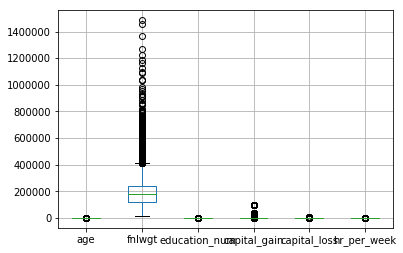

In [33]:
adult.boxplot()

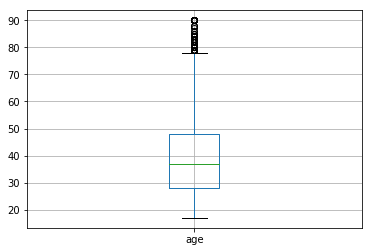

In [34]:
adult.boxplot(column = 'age')

In [35]:
# lower wisker is 0th percentile, lower box is 25th percentile, middle box is 50th percentile,
# top box is 75th percentile, top wisker is 100th percentile, circles above are suspected outliers.

### How far is far enough to be considered an outlier?

1) Consult an expert in the area in which data lives

2) A technique specific for the mean/std

3) A technique specific for median/ iqr

## Consulting an expert

The expert should simply tell you where the cutoffs are for outliers.

In our adult dataset, we may consult an economist or expert in income. Suppose our expert says that we only want to consider incomes from people between 22 and 72 years of age. 

Once we have these cutoffs, we'll want to remove any data from ages outside this range before commencing with our more rigorous statistical analysis.

In [36]:
# create a copy of the dataset as a backup
adult_original_data = adult

# count the total number of outlier rows at each extreme
print len(adult[adult['age'] < 22 ] )
print len(adult[adult['age'] > 72 ] )

# count the total number of outlier rows at each extreme for high income earners
print len(adult[(adult['income'] == '>50K') & (adult['age'] < 22 )] )
print len(adult[(adult['income'] == '>50K') & (adult['age'] > 72) ])

3130
401
5
69


In [37]:
# create a new dataframe with the outliers dropped
adult_expert_outlier_drop = adult.drop(
    adult.index[
        (adult['age'] < 22) | (adult['age'] > 72)
    ]
)

adult_expert_outlier_drop

,age,type-employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Drop outliers using mean and standard deviation

A purely applied statistical rule of thumb is that outliers are those datapoints that are more than 2 or 3 standard deviations from the mean.

In [38]:
# create syntactical sugar
age = adult['age']
income = adult['income']
age_mean = age.mean()
age_std = age.std()

# count the number of outliers we have
print len( adult[age > age_mean + (2.5 * age_std)])
print len( adult[age < age_mean - (2.5 * age_std)])

# count the number of outliers we have from high income earners
print len( adult[(income == '>50K') & (age > age_mean + (2.5 * age_std))])
print len( adult[(income == '>50K') & (age < age_mean - (2.5 * age_std))])

# drop outliers
adult_mean_outlier_drop = adult.drop(
    adult.index[
        (age > age_mean + (2.5 * age_std)) | (age < age_mean - (2.5 * age_std) )
    ]
)

print age_mean + (2.5 * age_std)
print age_mean - (2.5 * age_std)

adult_mean_outlier_drop

401
0
69
0
72.6827281393
4.48056537137


,age,type-employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Removing outliers using the median and IQR

In this method, thed rule of thumb is that any datapoint more than 1.5 IQR's away from the median is considered an outlier

In [39]:
# create syntactical sugar
age = adult['age']
income = adult['income']
age_median = age.median()
age_iqr = IQR(age)

# count the number of outliers we have
print len( adult[age > age_median + (1.5 * age_iqr)])
print len( adult[age < age_median - (1.5 * age_iqr)])

# count the number of outliers we have from high income earners
print len( adult[(income == '>50K') & (age > age_median + (1.5 * age_iqr))])
print len( adult[(income == '>50K') & (age < age_median - (1.5 * age_iqr))])

# drop outliers
adult_median_outlier_drop = adult.drop(
    adult.index[
        (age > age_median + (1.5 * age_iqr)) | (age < age_median - (1.5 * age_iqr) )
    ]
)

print age_median + (1.5 * age_iqr)
print age_median - (1.5 * age_iqr)

adult_median_outlier_drop

857
0
161
0
67.0
7.0


,age,type-employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [40]:
adult_eda = adult_expert_outlier_drop
adult_eda.head()

,age,type-employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Measures of Centrality and Spread

This is where we find the mean or median for all numerical variables as well as standard deviation or interquartile range. We also like to depict them using histograms or boxplots.

### Worksheet 1
For the adult_eda datafram, find the mean, standard deviation, median, and IQR for men and women. Also draw histograms and boxplots.

In [41]:
men_eda = adult_eda[adult_eda['sex'] == 'Male']
women_eda = adult_eda[adult_eda['sex'] == 'Female']

print men_eda.mean()
print men_eda.std()
print men_eda.median()
print IQR(men_eda)
print women_eda.mean()
print women_eda.std()
print women_eda.median()
print IQR(women_eda)

age                  40.553517
fnlwgt           191100.812880
education_num        10.240461
capital_gain       1422.156252
capital_loss        104.940274
hr_per_week          43.490976
dtype: float64
age                  11.846848
fnlwgt           106511.065510
education_num         2.666072
capital_gain       8629.237853
capital_loss        439.451271
hr_per_week          11.416660
dtype: float64
age                  39.0
fnlwgt           179488.0
education_num        10.0
capital_gain          0.0
capital_loss          0.0
hr_per_week          40.0
dtype: float64
age                  18.0
fnlwgt           121863.0
education_num         4.0
capital_gain          0.0
capital_loss          0.0
hr_per_week          10.0
dtype: float64
age                  39.165992
fnlwgt           185303.377612
education_num        10.222344
capital_gain        634.547653
capital_loss         62.845497
hr_per_week          38.054382
dtype: float64
age                  12.263991
fnlwgt           102307.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D691DD8>,
      dtype=object)

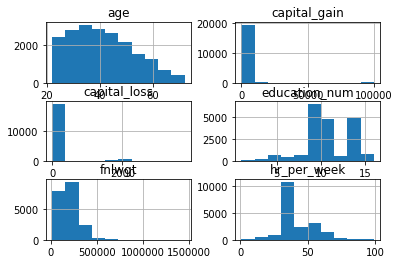

In [42]:
men_eda.hist()

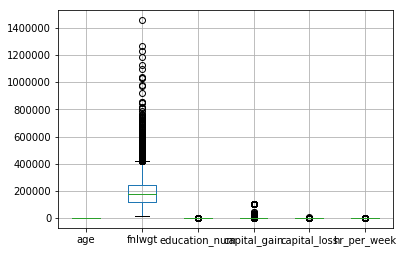

In [43]:
men_eda.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D6DB7F0>,
      dtype=object)

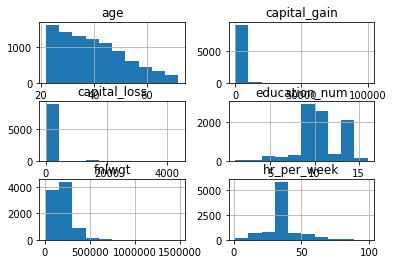

In [44]:
women_eda.hist()

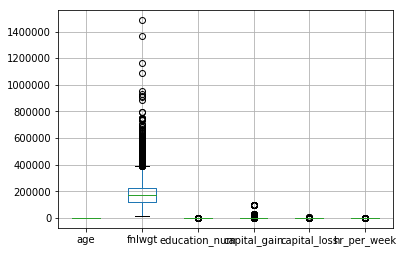

In [45]:
women_eda.boxplot()

## Measures of Symmetry

How symmetric is the data? We know it's center, so is your data symmetric about the mean or is it skewed to one direction?

consider three simple datasets:

1) {1,2,3} is symmetric about the median, which is 2. THis would have skew 0

2) {1,2,100} is not symmetric about the median, more weight to the right. We say this is skewed to the right

3) {-100, 2,3} is also not symmetric about median, more weight to the left. We say this is skewed to the left.

A rule of thumb for determining skewness

1) mean < median => skewed to the left

2) mean = median => no skew

3) mean > median => skewed right

There is an equation for skewness

$$ g_1 = \dfrac{1}{n-1} \dfrac{ \sum_i ( x_i - \bar{x} )^3 }{s^3} $$

There are many variants to this version of skew.


In [46]:
# compute skew of age
print adult_eda['age'].skew()

# mean and median age
print adult_eda['age'].mean()
print adult_eda['age'].median()

0.46794181414582703
40.116706855
39.0


## Worksheet 2

Compute skew for men, women, high income men, high income women

In [47]:
men_high_income_eda = adult_eda[(adult_eda['sex']=="Male") &(adult_eda['income'] == ">50K")]
women_high_income_eda = adult_eda[(adult_eda['sex']=="Female") &(adult_eda['income'] == ">50K")]
men_low_income_eda = adult_eda[(adult_eda['sex']=="Male") &(adult_eda['income'] == "<=50K")]
women_low_income_eda = adult_eda[(adult_eda['sex']=="Female") &(adult_eda['income'] == "<=50K")]


print men_eda['age'].skew()
print women_eda['age'].skew()
print men_high_income_eda['age'].skew()
print women_high_income_eda['age'].skew()

0.43641534933720055
0.5512599490866336
0.26939920786882
0.403152886883592


We can view skewness by observing histogram of a variable

39.1659919028
38.0


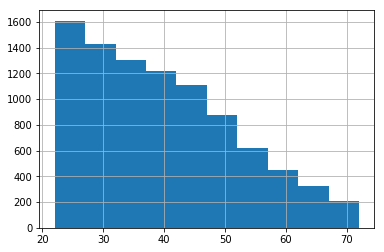

In [48]:
print women_eda['age'].mean()
print women_eda['age'].median()
women_eda['age'].hist()

In [49]:
# define a correlation matrix, gathers the correlation between all numerical variables of a df
# is  a simple matrix

adult_corr_matrix = adult_eda.corr()
print adult_corr_matrix

                    age    fnlwgt  education_num  capital_gain  capital_loss  \
age            1.000000 -0.073073      -0.039343      0.068705      0.048611   
fnlwgt        -0.073073  1.000000      -0.039922      0.000340     -0.009608   
education_num -0.039343 -0.039922       1.000000      0.119634      0.077492   
capital_gain   0.068705  0.000340       0.119634      1.000000     -0.033809   
capital_loss   0.048611 -0.009608       0.077492     -0.033809      1.000000   
hr_per_week   -0.029636 -0.022346       0.106808      0.074542      0.050921   

               hr_per_week  
age              -0.029636  
fnlwgt           -0.022346  
education_num     0.106808  
capital_gain      0.074542  
capital_loss      0.050921  
hr_per_week       1.000000  


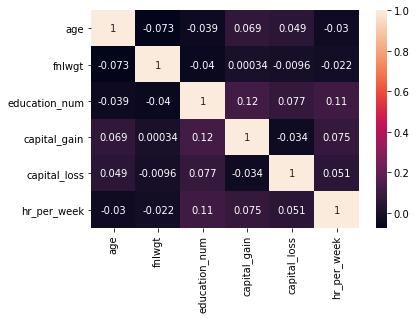

In [50]:
# import seaborn library
import seaborn as sns

# plot a correlation heatmap
sns.heatmap(
    adult_corr_matrix,
    xticklabels = adult_corr_matrix.columns,
    yticklabels = adult_corr_matrix.columns,
    annot = True
)



Scatterplots offer a visual to see the relationship between two numerical variables with more detail than the single value that the correlation can offer

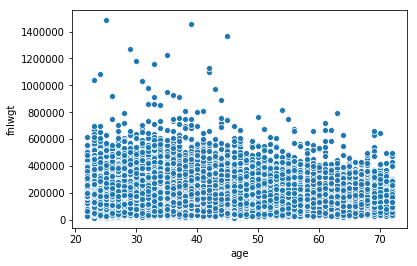

In [51]:
sns.scatterplot(data = adult_eda, x ='age' , y = 'fnlwgt')
plt.show()

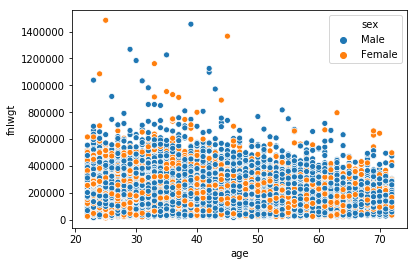

In [52]:
# customize the plot by coloring the points by some group given by a categorical variable
sns.scatterplot(data = adult_eda, x ='age' , y = 'fnlwgt', hue = 'sex')
plt.show()

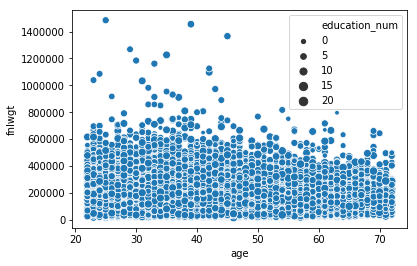

In [53]:
# customize the plot by sizing the points by some group given by a third numerical variable
sns.scatterplot(data = adult_eda, x ='age' , y = 'fnlwgt', size = 'education_num')
plt.show()

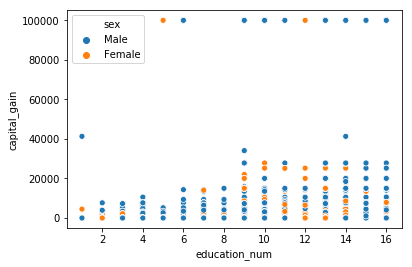

In [54]:
# customize the plot by coloring the points by some group given by a categorical variable
sns.scatterplot(data = adult_eda, x ='education_num' , y = 'capital_gain', hue = 'sex')
plt.show()

In [55]:
# to draw a barchart, we need to count the number of times each value appears in a cat variable
# The way to do this is use groupby function.

# Answer to worksheet question 4

count_emp = adult.groupby(['type_employer'])
count_emp.plot(kind='barh')

KeyError: 'type_employer'

In [56]:
def mean_bootstrap(sample_data, number_of_resamples):
    x = [0]*number_of_resamples #initializes an array
    for i in range(number_of_resamples):
        resample = [
            sample_data[j]
            for j
            in np.random.randint(len(sample_data), size=len(sample_data))
        ]
        x[i] = np.mean(resample)
    return x

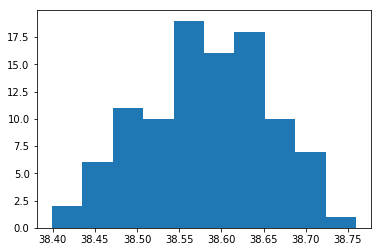

In [58]:
m = mean_bootstrap(adult['age'], 100) # usually would do about 10,000 resamples

plt.hist(m)
plt.show()

In [60]:
print "The mean age of our empirical distribution is ", np.mean(m)
print "The standard error of our empirical distribution is ", np.std(m)
print "The mean age of all adults in our sample is ", np.mean(adult['age'])

The mean age of our empirical distribution is  38.58240932403796
The standard error of our empirical distribution is  0.07294983516907844
The mean age of all adults in our sample is  38.5816467553
